In [1]:
import pandas as pd

In [2]:
import os
os.chdir('C:\\Revathi\\Top Grads\\python\\dataset\\titanic')

In [3]:
train_data=pd.read_csv('train.csv')

In [4]:
print("the dimension of the table:",train_data.shape)

the dimension of the table: (891, 12)


In [5]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(20,10)



In [9]:
feature=['Age', 'SibSp', 'Parch', 'Fare']
x=feature
y=['counts','counts','counts','counts']

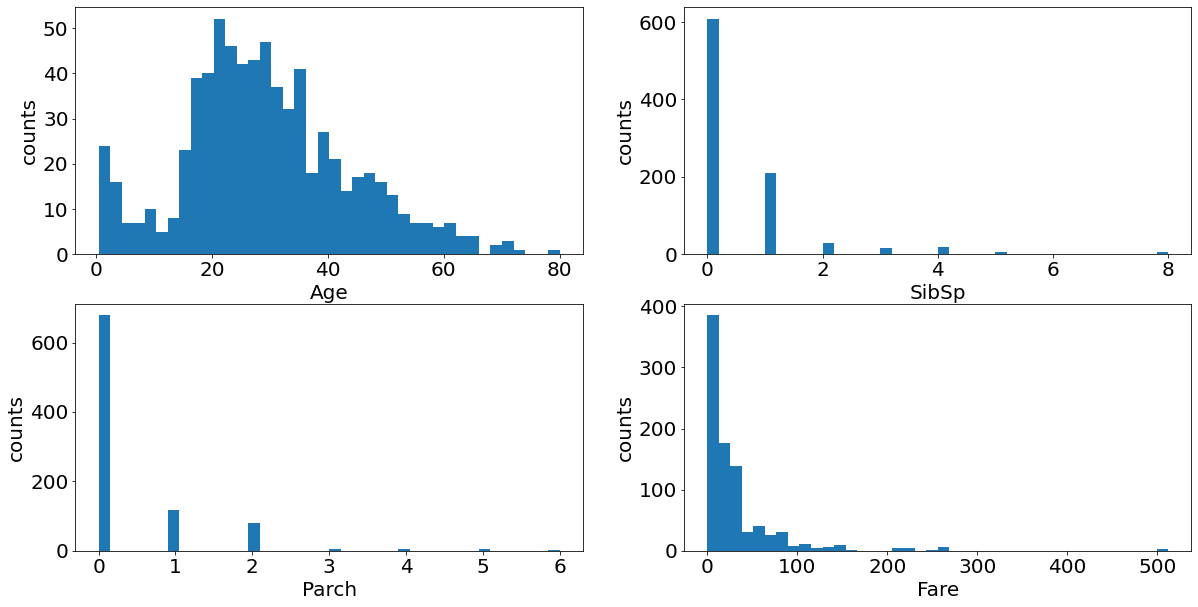

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes=axes.ravel()
for i, n in enumerate(axes):
    n.hist(train_data[feature[i]].dropna(), bins=40)
    n.set_xlabel(x[i], fontsize=20)
    n.set_ylabel(y[i], fontsize=20)
    n.tick_params(axis='both',labelsize=20)

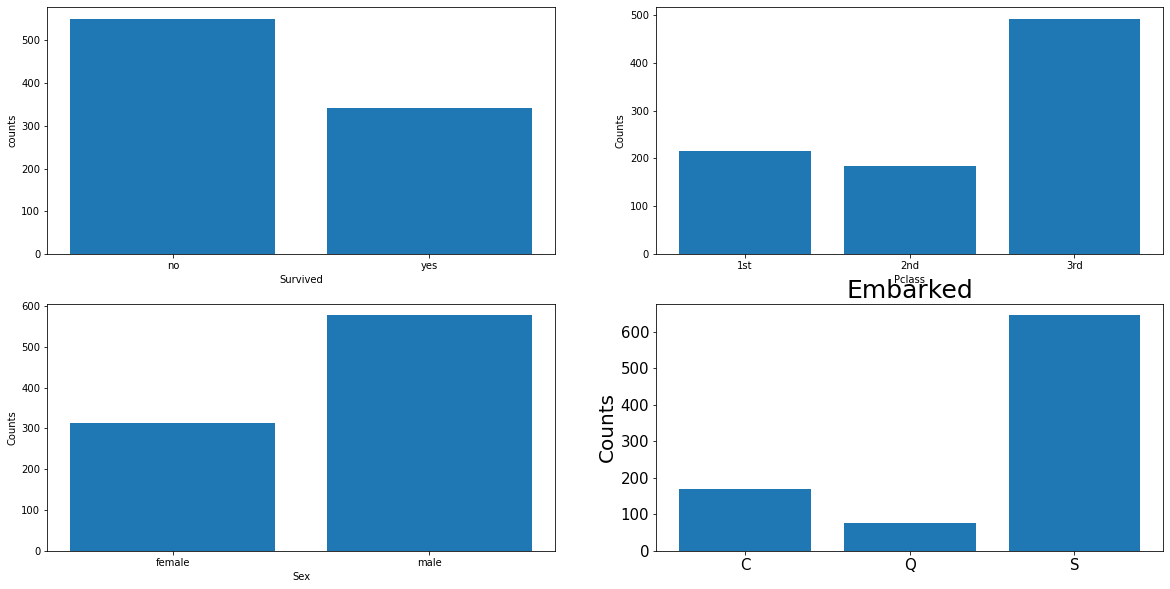

In [11]:
plt.rcParams['figure.figsize']=(20,10)
fig, axes=plt.subplots(nrows=2, ncols=2)
x_sur=train_data.replace({'Survived':{1:'yes',0:'no'}}).groupby('Survived').size().reset_index(name='counts')['Survived']
y_sur=train_data.replace({'Survived':{1:'yes',0:'no'}}).groupby('Survived').size().reset_index(name='counts')['counts']
axes[0,0].bar(x_sur,y_sur)
axes[0,0].set_xlabel('Survived', fontsize=10)
axes[0,0].set_ylabel('counts', fontsize=10)
axes[0,0].tick_params(axis='both',labelsize=10)
x_pclass=train_data.replace({'Pclass':{1:'1st',2:'2nd',3:'3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
y_pclass=train_data.replace({'Pclass':{1:'1st',2:'2nd',3:'3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']
axes[0,1].bar(x_pclass,y_pclass)
axes[0,1].set_xlabel('Pclass', fontsize=10)
axes[0,1].set_ylabel('Counts',fontsize=10)
axes[0,1].tick_params(axis='both',labelsize=10)
x_sex=train_data.groupby('Sex').size().reset_index(name='Counts')['Sex']
y_sex=train_data.groupby('Sex').size().reset_index(name='Counts')['Counts']
axes[1,0].bar(x_sex,y_sex)
axes[1,0].set_xlabel('Sex', fontsize=10)
axes[1,0].set_ylabel('Counts',fontsize=10)
axes[1,0].tick_params(axis='both',labelsize=10)
X_Embarked = train_data.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = train_data.groupby('Embarked').size().reset_index(name='Counts')['Counts']
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)







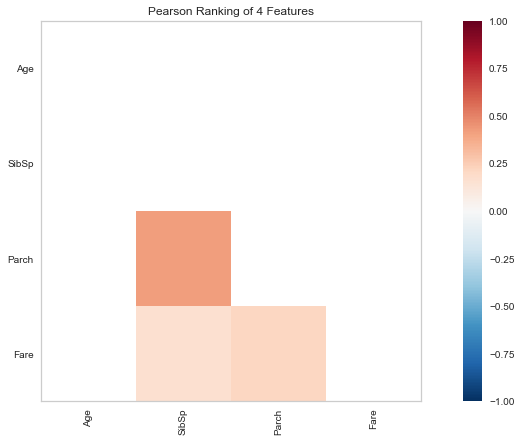

<AxesSubplot:title={'center':'Pearson Ranking of 4 Features'}>

In [29]:
import yellowbrick
import numpy as np
from yellowbrick.features import Rank2D
%matplotlib inline
plt.rcParams['figure.figsize']=(15,7)
x_feature = train_data[feature]

visualizer = Rank2D(feature1=feature, algorithm='pearson')
visualizer.fit(x_feature)                # Fit the data to the visualizer
visualizer.transform(x_feature)             # Transform the data
visualizer.poof()   
